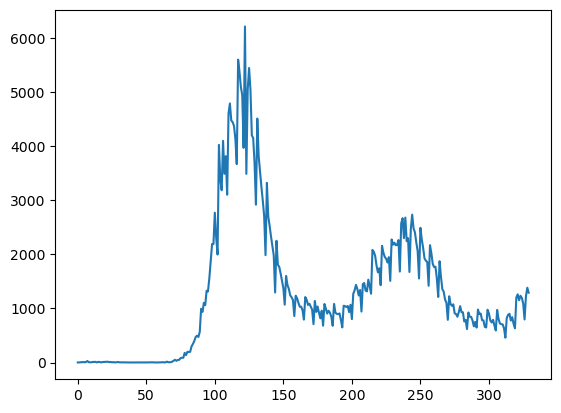

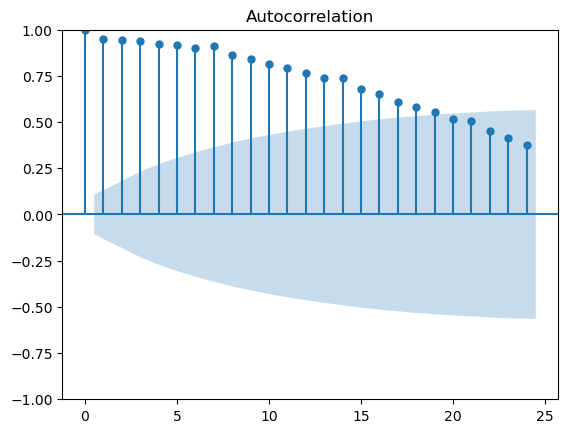

D:\88690\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


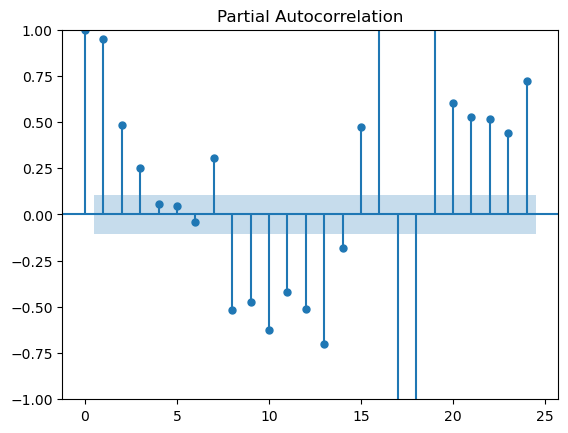

In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from tensorflow import keras
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import SimpleRNN
from tensorflow.keras.layers import LeakyReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# LSTM with regression framing
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from keras import optimizers
dataset = pandas.read_csv(r'各縣市每日確診資料\彰化縣每日確診數.csv', usecols=[2], engine='python', skipfooter=3,encoding='utf-8')
plt.plot(dataset)
plt.savefig('Changhua.png')
plt.show()

# 畫出 ACF 12 期的效應
sm.graphics.tsa.plot_acf(dataset, lags=24)
plt.savefig('Changhua_acf_24.png')
plt.show()
# 畫出 PACF 12 期的效應
sm.graphics.tsa.plot_pacf(dataset, lags=24)
plt.savefig('Changhua_pacf_24.png')
plt.show()

In [2]:
# 產生 (X, Y) 資料集, Y 是下一期的感染人數
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

# 載入訓練資料
dataframe = read_csv(r'各縣市每日確診資料\彰化縣每日確診數.csv', usecols=[2], engine='python', skipfooter=0,encoding='utf-8')
dataframe=dataframe.drop(dataframe[dataframe['確定病例數']==0].index,axis=0)
print(dataframe)
#plt.plot(dataframe)

dataset = dataframe.values
print(len(dataset))
#dataset=np.delete(dataset,[0,768],axis=0)

# 正規化(normalize) 資料，使資料值介於[0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

     確定病例數
0        1
1        2
2        1
3        6
4        9
..     ...
326    797
327   1224
328   1384
329   1293
330   1121

[331 rows x 1 columns]
331


## RNN結合LSTM架構

### Model1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1, 64)             4224      
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 37,313
Trainable params: 37,313
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
30/30 [==============================] - 5s 51ms/step - loss: 0.0779 - mse: 0.0779 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 2/1000
30/30 [==============================] - 0s 11ms/step - loss: 0.0504 - mse: 0.0504 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 3/1000
30/30 [==============================

30/30 [==============================] - 0s 6ms/step - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 57/1000
30/30 [==============================] - 0s 6ms/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 58/1000
30/30 [==============================] - 0s 6ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 59/1000
30/30 [==============================] - 0s 6ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 60/1000
30/30 [==============================] - 0s 11ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 61/1000
30/30 [==============================] - 0s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 62/1000
30/30 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 63/1000
30/30 [==============================] - 0s 11ms/step - loss: 0.0136

30/30 [==============================] - 0s 13ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 118/1000
30/30 [==============================] - 0s 9ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 119/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 120/1000
30/30 [==============================] - 0s 9ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 121/1000
30/30 [==============================] - 0s 10ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 122/1000
30/30 [==============================] - 0s 11ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 123/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 124/1000
30/30 [==============================] - 0s 8ms/step - loss

30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 179/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 180/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 181/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 182/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 183/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 184/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 185/1000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 240/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 241/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 242/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 243/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 244/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 245/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 246/1000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 301/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 302/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 303/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 304/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 305/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 306/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 307/1000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 362/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 363/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 364/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 365/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 366/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 367/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 368/1000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 423/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 424/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 425/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 426/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 427/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 428/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 429/1000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 484/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 485/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 486/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 487/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 488/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 489/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 490/1000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 545/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 546/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 547/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 548/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 549/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 550/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 551/1000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 606/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 607/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 608/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 609/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 610/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 611/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 612/1000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 667/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 668/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 669/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 670/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 671/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 672/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 673/1000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 728/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 729/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 730/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 731/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 732/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 733/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 734/1000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 789/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 790/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 791/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 792/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 793/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 794/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 795/1000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 850/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 851/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 852/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 853/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 854/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 855/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 856/1000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 911/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 912/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 913/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 914/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 915/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 916/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 917/1000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 972/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 973/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 974/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 975/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 976/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 977/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 978/1000
30/30 [==============================] - 0s 7ms/step - loss: 0

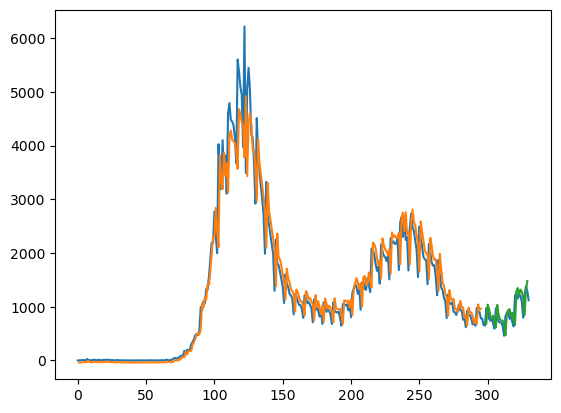

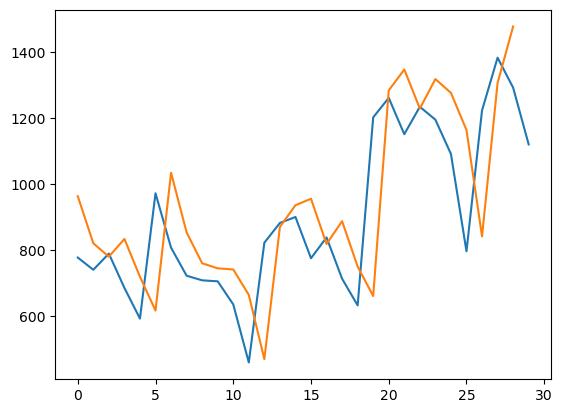

In [3]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    LSTM(64, activation='tanh'),
    Dense(1, activation='tanh')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="changhua_rnn+lstm_1000_1.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=1000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('changhua_rnn+lstm_1000_1.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
#看裡面的值是否合理、資料結構的dim
print(trainPredict,trainY)
print(testPredict,testY)

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('changhua_rnn+lstm_1000_plot_1.png') 
plt.show()
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("changhua_rnn+lstm_1000_predict&real_1.png")
plt.show()

### Model2

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 1, 128)            16640     
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 148,353
Trainable params: 148,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
30/30 [==============================] - 4s 37ms/step - loss: 0.0724 - mse: 0.0724 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 2/1000
30/30 [==============================] - 0s 11ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 3/1000
30/30 [==========================

30/30 [==============================] - 0s 7ms/step - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 57/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 58/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 59/1000
30/30 [==============================] - 0s 10ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 60/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 61/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 62/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 63/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0138 

30/30 [==============================] - 0s 9ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 118/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 119/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 120/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 121/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 122/1000
30/30 [==============================] - 0s 11ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 123/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 124/1000
30/30 [==============================] - 0s 7ms/step - loss: 

30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 179/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 180/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 181/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 182/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 183/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 184/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 185/1000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 240/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 241/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 242/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 243/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 244/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 245/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 246/1000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 301/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 302/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 303/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 304/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 305/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 306/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 307/1000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 362/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 363/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 364/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 365/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 366/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 367/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 368/1000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 423/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 424/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 425/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 426/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 427/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 428/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 429/1000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 484/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 485/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 486/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 487/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 488/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 489/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 490/1000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 545/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 546/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 547/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 548/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 549/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 550/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 551/1000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 606/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 607/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 608/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 609/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 610/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 611/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 612/1000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 667/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 668/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 669/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 670/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 671/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 672/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 673/1000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 728/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 729/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 730/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 731/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 732/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 733/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 734/1000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 789/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 790/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 791/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 792/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 793/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 794/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 795/1000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 850/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 851/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 852/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 853/1000
30/30 [==============================] - 0s 10ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 854/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 855/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 856/1000
30/30 [==============================] - 0s 7ms/step - loss: 

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 911/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 912/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 913/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 914/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 915/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 916/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 917/1000
30/30 [==============================] - 0s 8ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 972/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 973/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 974/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 975/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 976/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 977/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 978/1000
30/30 [==============================] - 0s 7ms/step - loss: 0

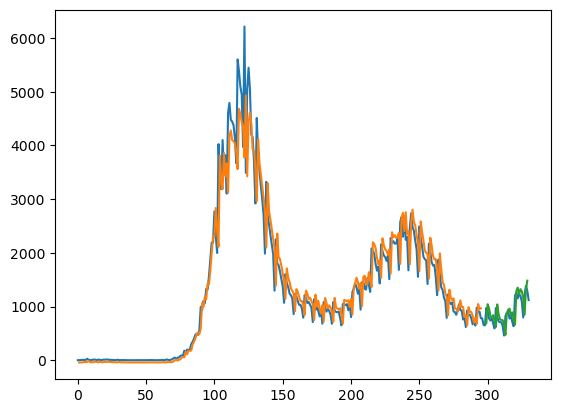

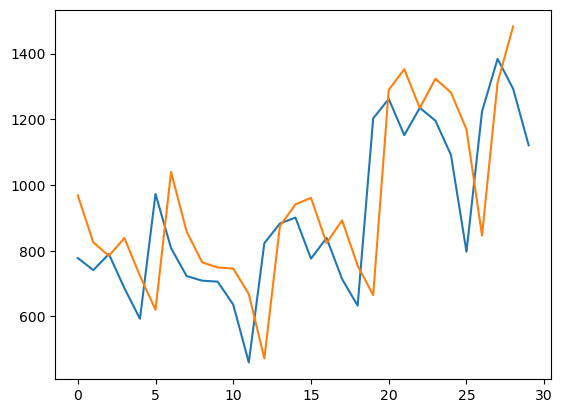

In [4]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(128, return_sequences=True, input_shape=(1, look_back)),
    LSTM(128, activation='tanh'),
    Dense(1, activation='tanh')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="changhua_rnn+lstm_1000_2.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=1000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('changhua_rnn+lstm_1000_2.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('changhua_rnn+lstm_1000_plot_2.png') 
plt.show()
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("changhua_rnn+lstm_1000_predict&real_2.png")
plt.show()

### Model3

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 1, 64)             4224      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 1, 64)             8256      
                                                                 
 dense_2 (Dense)             (None, 1, 64)             4160      
                                                                 
 lstm_2 (LSTM)               (None, 1, 64)             33024     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 82,753
Trainable params: 82,753
Non-trai

30/30 [==============================] - 0s 9ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 54/1000
30/30 [==============================] - 0s 9ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 55/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 56/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 57/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 58/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 59/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 60/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0052 -

30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 115/1000
30/30 [==============================] - 0s 13ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 116/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 117/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 118/1000
30/30 [==============================] - 0s 16ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 119/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 120/1000
30/30 [==============================] - 0s 17ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 121/1000
30/30 [==============================] - 0s 8ms/step - loss

Epoch 175/1000
30/30 [==============================] - 0s 12ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 9.9081e-04 - val_mse: 9.9081e-04
Epoch 176/1000
30/30 [==============================] - 0s 13ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 9.8910e-04 - val_mse: 9.8910e-04
Epoch 177/1000
30/30 [==============================] - 0s 17ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 9.8736e-04 - val_mse: 9.8736e-04
Epoch 178/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 9.8822e-04 - val_mse: 9.8822e-04
Epoch 179/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 9.9066e-04 - val_mse: 9.9066e-04
Epoch 180/1000
30/30 [==============================] - 0s 15ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 9.8555e-04 - val_mse: 9.8555e-04
Epoch 181/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 9.8988e-04 - val_mse: 9.8988e-04
Ep

30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.7225e-04 - val_mse: 9.7225e-04
Epoch 233/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 9.6623e-04 - val_mse: 9.6623e-04
Epoch 234/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 9.7299e-04 - val_mse: 9.7299e-04
Epoch 235/1000
30/30 [==============================] - 0s 15ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.6366e-04 - val_mse: 9.6366e-04
Epoch 236/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 9.6640e-04 - val_mse: 9.6640e-04
Epoch 237/1000
30/30 [==============================] - 0s 14ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.6077e-04 - val_mse: 9.6077e-04
Epoch 238/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.6431e-04 - val_mse: 9.6431e-04
Epoch 239/1000
30/3

Epoch 290/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.5500e-04 - val_mse: 9.5500e-04
Epoch 291/1000
30/30 [==============================] - 0s 10ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.4815e-04 - val_mse: 9.4815e-04
Epoch 292/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.6543e-04 - val_mse: 9.6543e-04
Epoch 293/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.5068e-04 - val_mse: 9.5068e-04
Epoch 294/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.4918e-04 - val_mse: 9.4918e-04
Epoch 295/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.5130e-04 - val_mse: 9.5130e-04
Epoch 296/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.5855e-04 - val_mse: 9.5855e-04
Epoch

Epoch 348/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.5347e-04 - val_mse: 9.5347e-04
Epoch 349/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.5722e-04 - val_mse: 9.5722e-04
Epoch 350/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.4815e-04 - val_mse: 9.4815e-04
Epoch 351/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.7725e-04 - val_mse: 9.7725e-04
Epoch 352/1000
30/30 [==============================] - 0s 10ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.4262e-04 - val_mse: 9.4262e-04
Epoch 353/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.5187e-04 - val_mse: 9.5187e-04
Epoch 354/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.4444e-04 - val_mse: 9.4444e-04
Epoch

Epoch 406/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.4897e-04 - val_mse: 9.4897e-04
Epoch 407/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.5364e-04 - val_mse: 9.5364e-04
Epoch 408/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.6310e-04 - val_mse: 9.6310e-04
Epoch 409/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.5218e-04 - val_mse: 9.5218e-04
Epoch 410/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.4376e-04 - val_mse: 9.4376e-04
Epoch 411/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.4864e-04 - val_mse: 9.4864e-04
Epoch 412/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.4531e-04 - val_mse: 9.4531e-04
Epoch 

Epoch 464/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4570e-04 - val_mse: 9.4570e-04
Epoch 465/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.5522e-04 - val_mse: 9.5522e-04
Epoch 466/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.3641e-04 - val_mse: 9.3641e-04
Epoch 467/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.5704e-04 - val_mse: 9.5704e-04
Epoch 468/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4706e-04 - val_mse: 9.4706e-04
Epoch 469/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.3508e-04 - val_mse: 9.3508e-04
Epoch 470/1000
30/30 [==============================] - 0s 10ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3334e-04 - val_mse: 9.3334e-04
Epoch

Epoch 522/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.5365e-04 - val_mse: 9.5365e-04
Epoch 523/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3713e-04 - val_mse: 9.3713e-04
Epoch 524/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4088e-04 - val_mse: 9.4088e-04
Epoch 525/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4284e-04 - val_mse: 9.4284e-04
Epoch 526/1000
30/30 [==============================] - 0s 10ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.2879e-04 - val_mse: 9.2879e-04
Epoch 527/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4323e-04 - val_mse: 9.4323e-04
Epoch 528/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3076e-04 - val_mse: 9.3076e-04
Epoch

30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.3197e-04 - val_mse: 9.3197e-04
Epoch 580/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4481e-04 - val_mse: 9.4481e-04
Epoch 581/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3051e-04 - val_mse: 9.3051e-04
Epoch 582/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3169e-04 - val_mse: 9.3169e-04
Epoch 583/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.6755e-04 - val_mse: 9.6755e-04
Epoch 584/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4891e-04 - val_mse: 9.4891e-04
Epoch 585/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3238e-04 - val_mse: 9.3238e-04
Epoch 586/1000
30/30 

Epoch 637/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2318e-04 - val_mse: 9.2318e-04
Epoch 638/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2717e-04 - val_mse: 9.2717e-04
Epoch 639/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4263e-04 - val_mse: 9.4263e-04
Epoch 640/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2700e-04 - val_mse: 9.2700e-04
Epoch 641/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.7384e-04 - val_mse: 9.7384e-04
Epoch 642/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3817e-04 - val_mse: 9.3817e-04
Epoch 643/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2760e-04 - val_mse: 9.2760e-04
Epoch 

Epoch 695/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.5097e-04 - val_mse: 9.5097e-04
Epoch 696/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4355e-04 - val_mse: 9.4355e-04
Epoch 697/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4880e-04 - val_mse: 9.4880e-04
Epoch 698/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.3210e-04 - val_mse: 9.3210e-04
Epoch 699/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3643e-04 - val_mse: 9.3643e-04
Epoch 700/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4905e-04 - val_mse: 9.4905e-04
Epoch 701/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4574e-04 - val_mse: 9.4574e-04
Epoch 

Epoch 753/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4135e-04 - val_mse: 9.4135e-04
Epoch 754/1000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4396e-04 - val_mse: 9.4396e-04
Epoch 755/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2440e-04 - val_mse: 9.2440e-04
Epoch 756/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2428e-04 - val_mse: 9.2428e-04
Epoch 757/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.5208e-04 - val_mse: 9.5208e-04
Epoch 758/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2868e-04 - val_mse: 9.2868e-04
Epoch 759/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2384e-04 - val_mse: 9.2384e-04
Epoch 

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2288e-04 - val_mse: 9.2288e-04
Epoch 811/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3745e-04 - val_mse: 9.3745e-04
Epoch 812/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2867e-04 - val_mse: 9.2867e-04
Epoch 813/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2761e-04 - val_mse: 9.2761e-04
Epoch 814/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2611e-04 - val_mse: 9.2611e-04
Epoch 815/1000
30/30 [==============================] - 0s 13ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1681e-04 - val_mse: 9.1681e-04
Epoch 816/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4035e-04 - val_mse: 9.4035e-04
Epoch 817/1000
30/30

Epoch 868/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3211e-04 - val_mse: 9.3211e-04
Epoch 869/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2275e-04 - val_mse: 9.2275e-04
Epoch 870/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2311e-04 - val_mse: 9.2311e-04
Epoch 871/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3039e-04 - val_mse: 9.3039e-04
Epoch 872/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3461e-04 - val_mse: 9.3461e-04
Epoch 873/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2459e-04 - val_mse: 9.2459e-04
Epoch 874/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3105e-04 - val_mse: 9.3105e-04
Epoch 

Epoch 926/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.5127e-04 - val_mse: 9.5126e-04
Epoch 927/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2039e-04 - val_mse: 9.2039e-04
Epoch 928/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3559e-04 - val_mse: 9.3559e-04
Epoch 929/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3803e-04 - val_mse: 9.3803e-04
Epoch 930/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3052e-04 - val_mse: 9.3052e-04
Epoch 931/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3014e-04 - val_mse: 9.3014e-04
Epoch 932/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2040e-04 - val_mse: 9.2040e-04
Epoch 

Epoch 984/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.5388e-04 - val_mse: 9.5388e-04
Epoch 985/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.5671e-04 - val_mse: 9.5671e-04
Epoch 986/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4643e-04 - val_mse: 9.4643e-04
Epoch 987/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1812e-04 - val_mse: 9.1812e-04
Epoch 988/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2365e-04 - val_mse: 9.2365e-04
Epoch 989/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4517e-04 - val_mse: 9.4517e-04
Epoch 990/1000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2696e-04 - val_mse: 9.2696e-04
Epoch 

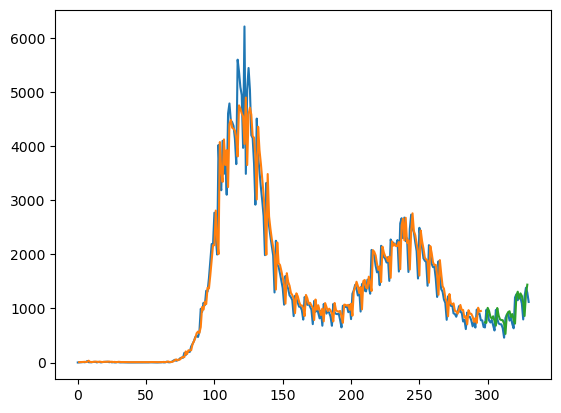

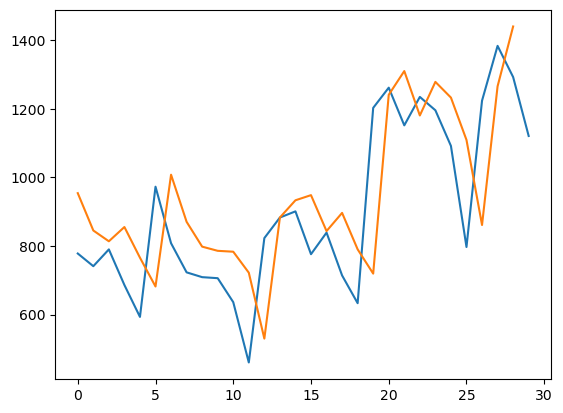

In [5]:
from tensorflow.keras.layers import Flatten,Reshape
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    SimpleRNN(64, return_sequences=True, activation='selu'),
    Dense(64, activation='selu'),
    LSTM(64, return_sequences=True, activation='selu'),
    LSTM(64, return_sequences=False, activation='selu'),
    Dense(1, activation='tanh')
])

model.output_shape
#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="changhua_rnn+lstm_1000_3.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=1000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('changhua_rnn+lstm_1000_3.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict=trainPredict.reshape(-1, 1)
testPredict=testPredict.reshape(-1, 1)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('changhua_rnn+lstm_1000_plot_3.png') 
plt.show()

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("changhua_rnn+lstm_1000_predict&real_3.png")
plt.show()

### Model4

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 1, 64)             4224      
                                                                 
 dense_4 (Dense)             (None, 1, 4)              260       
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 1, 64)             4416      
                                                                 
 dense_5 (Dense)             (None, 1, 1)              65        
                                                                 
 lstm_4 (LSTM)               (None, 1, 64)             16896     
                                                                 
 dense_6 (Dense)             (None, 1, 4)              260       
                                                                 
 lstm_5 (LSTM)               (None, 1, 64)            

Epoch 51/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0433 - mse: 0.0433 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 52/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0429 - mse: 0.0429 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 53/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0428 - mse: 0.0428 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 54/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0425 - mse: 0.0425 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 55/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0421 - mse: 0.0421 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 56/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0413 - mse: 0.0413 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 57/1000
295/295 [==============================] - 2s 6ms/step - loss: 0.0412 - mse: 0.0412 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 58/1000
295/295 [==============================] 

295/295 [==============================] - 2s 5ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 111/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 112/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 113/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 114/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 115/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 9.6636e-04 - val_mse: 9.6636e-04
Epoch 116/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 117/1000
295/295 [==============================]

295/295 [==============================] - 2s 5ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 170/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 9.6522e-04 - val_mse: 9.6522e-04
Epoch 171/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 172/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 9.5069e-04 - val_mse: 9.5069e-04
Epoch 173/1000
295/295 [==============================] - 2s 6ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 9.3127e-04 - val_mse: 9.3127e-04
Epoch 174/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 175/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 176/1000
295/295 [===============

Epoch 228/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 229/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 9.6859e-04 - val_mse: 9.6859e-04
Epoch 230/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 231/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 232/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0111 - mse: 0.0111 - val_loss: 9.6918e-04 - val_mse: 9.6918e-04
Epoch 233/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 9.8549e-04 - val_mse: 9.8549e-04
Epoch 234/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 235/1000
295/295 [

295/295 [==============================] - 2s 5ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 9.5710e-04 - val_mse: 9.5710e-04
Epoch 287/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 288/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 289/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 290/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 291/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 292/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 293/1000
295/295 [==============================]

Epoch 345/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 346/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 9.0556e-04 - val_mse: 9.0556e-04
Epoch 347/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 348/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 9.1049e-04 - val_mse: 9.1049e-04
Epoch 349/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 8.9057e-04 - val_mse: 8.9057e-04
Epoch 350/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 351/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 9.2812e-04 - val_mse: 9.2812e-04
Epoch 352/1000
2

295/295 [==============================] - 2s 5ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 404/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 9.3773e-04 - val_mse: 9.3773e-04
Epoch 405/1000
295/295 [==============================] - 2s 6ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 406/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 9.8453e-04 - val_mse: 9.8453e-04
Epoch 407/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 408/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 9.0506e-04 - val_mse: 9.0506e-04
Epoch 409/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 9.1124e-04 - val_mse: 9.1124e-04
Epoch 410/1000
295/295 [=======

Epoch 462/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 463/1000
295/295 [==============================] - 2s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 9.4124e-04 - val_mse: 9.4124e-04
Epoch 464/1000
295/295 [==============================] - 2s 6ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 9.1596e-04 - val_mse: 9.1596e-04
Epoch 465/1000
295/295 [==============================] - 2s 6ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 466/1000
295/295 [==============================] - 2s 6ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 9.3298e-04 - val_mse: 9.3298e-04
Epoch 467/1000
295/295 [==============================] - 2s 6ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 8.9709e-04 - val_mse: 8.9709e-04
Epoch 468/1000
295/295 [==============================] - 2s 6ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 9.0240e-04 - val_mse: 9.0240e-04
Epoch 46

295/295 [==============================] - 2s 6ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 9.1019e-04 - val_mse: 9.1019e-04
Epoch 521/1000
295/295 [==============================] - 2s 6ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 522/1000
295/295 [==============================] - 2s 6ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 523/1000
295/295 [==============================] - 2s 8ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 9.0153e-04 - val_mse: 9.0153e-04
Epoch 524/1000
295/295 [==============================] - 2s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 9.8815e-04 - val_mse: 9.8815e-04
Epoch 525/1000
295/295 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 8.7407e-04 - val_mse: 8.7407e-04
Epoch 526/1000
295/295 [==============================] - 2s 6ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 8.9125e-04 - val_mse: 8.9125e-04
Epoch 527/1000
295/295 

295/295 [==============================] - 2s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 579/1000
295/295 [==============================] - 2s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 580/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 9.3530e-04 - val_mse: 9.3530e-04
Epoch 581/1000
295/295 [==============================] - 2s 6ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 582/1000
295/295 [==============================] - 2s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 583/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 584/1000
295/295 [==============================] - 2s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 9.1332e-04 - val_mse: 9.1332e-04
Epoch 585/1000
295/295 [=======================

295/295 [==============================] - 2s 5ms/step - loss: 0.0126 - mse: 0.0126 - val_loss: 8.7197e-04 - val_mse: 8.7197e-04
Epoch 637/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 9.1208e-04 - val_mse: 9.1208e-04
Epoch 638/1000
295/295 [==============================] - 2s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 8.9375e-04 - val_mse: 8.9375e-04
Epoch 639/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 9.4116e-04 - val_mse: 9.4116e-04
Epoch 640/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 641/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 8.8886e-04 - val_mse: 8.8886e-04
Epoch 642/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 8.7202e-04 - val_mse: 8.7202e-04
Epoch 643/1000


295/295 [==============================] - 2s 5ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 695/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 8.9426e-04 - val_mse: 8.9426e-04
Epoch 696/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 9.4908e-04 - val_mse: 9.4908e-04
Epoch 697/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 9.4797e-04 - val_mse: 9.4797e-04
Epoch 698/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 9.0129e-04 - val_mse: 9.0129e-04
Epoch 699/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 8.9504e-04 - val_mse: 8.9504e-04
Epoch 700/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 701/1000
295/295 

295/295 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 8.9490e-04 - val_mse: 8.9490e-04
Epoch 753/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 754/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 9.1009e-04 - val_mse: 9.1009e-04
Epoch 755/1000
295/295 [==============================] - 2s 6ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 8.9183e-04 - val_mse: 8.9183e-04
Epoch 756/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 757/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 758/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 8.8868e-04 - val_mse: 8.8868e-04
Epoch 759/1000
295/295 [=======

295/295 [==============================] - 2s 5ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 9.1249e-04 - val_mse: 9.1249e-04
Epoch 811/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 9.0233e-04 - val_mse: 9.0233e-04
Epoch 812/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 8.7698e-04 - val_mse: 8.7698e-04
Epoch 813/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 814/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 815/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 816/1000
295/295 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 817/1000
295/295 [===============

Epoch 869/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 8.7776e-04 - val_mse: 8.7776e-04
Epoch 870/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0113 - mse: 0.0113 - val_loss: 8.6459e-04 - val_mse: 8.6459e-04
Epoch 871/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 872/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 873/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 874/1000
295/295 [==============================] - 2s 6ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 8.9821e-04 - val_mse: 8.9821e-04
Epoch 875/1000
295/295 [==============================] - 2s 6ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 876/1000
295/295 [

295/295 [==============================] - 2s 6ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 8.7237e-04 - val_mse: 8.7237e-04
Epoch 928/1000
295/295 [==============================] - 2s 6ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 929/1000
295/295 [==============================] - 2s 7ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 9.4680e-04 - val_mse: 9.4680e-04
Epoch 930/1000
295/295 [==============================] - 2s 6ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 9.2158e-04 - val_mse: 9.2158e-04
Epoch 931/1000
295/295 [==============================] - 3s 9ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 9.0326e-04 - val_mse: 9.0326e-04
Epoch 932/1000
295/295 [==============================] - 2s 6ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 8.8373e-04 - val_mse: 8.8373e-04
Epoch 933/1000
295/295 [==============================] - 2s 6ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 934/1000
295/295 

295/295 [==============================] - 2s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 8.8302e-04 - val_mse: 8.8302e-04
Epoch 986/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0117 - mse: 0.0117 - val_loss: 8.5451e-04 - val_mse: 8.5451e-04
Epoch 987/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 8.5458e-04 - val_mse: 8.5458e-04
Epoch 988/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 8.4600e-04 - val_mse: 8.4600e-04
Epoch 989/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 9.4823e-04 - val_mse: 9.4823e-04
Epoch 990/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 9.6955e-04 - val_mse: 9.6955e-04
Epoch 991/1000
295/295 [==============================] - 2s 5ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 992/1000


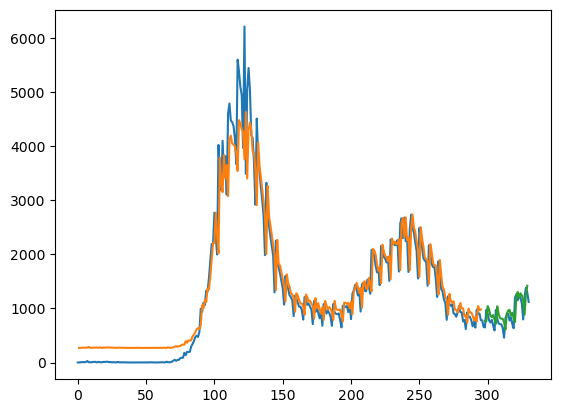

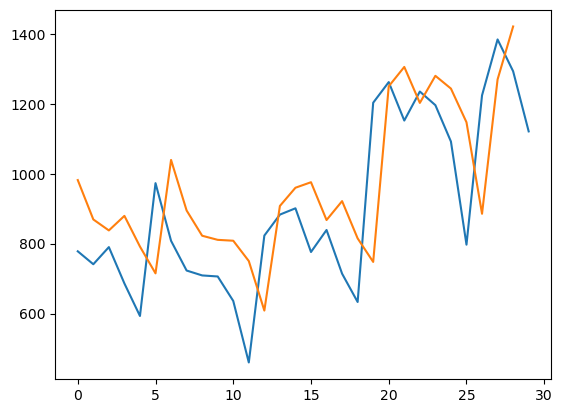

In [6]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    Dense(4, activation='elu'),
    SimpleRNN(64,return_sequences=True, activation='tanh'),
    Dense(1, activation='tanh'),
    LSTM(64,dropout=0.1,return_sequences=True, activation='elu'),
    Dense(4, activation='elu'),
    LSTM(64,dropout=0.1,return_sequences=True, activation='tanh'),
    Dense(1, activation='tanh')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="changhua_rnn+lstm_1000_4.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=1000, batch_size=1, verbose=1,callbacks=[model_checkpoint_callback])
model.save('changhua_rnn+lstm_1000_4.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict=trainPredict.reshape(-1, 1)
testPredict=testPredict.reshape(-1, 1)
# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('changhua_rnn+lstm_1000_plot_4.png') 
plt.show()

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("changhua_rnn+lstm_1000_predict&real_4.png")
plt.show()